<strong><b><font size="5">Smoothing</font></b></strong>

Smoothing (Suavização ou Alisamento) em séries temporais é um conjunto de métodos para suavizar séries temporais eliminando "saltos". Existem várias maneiras de fazer isso. Talvez o mais fácil seja calcular a média móvel simples (Simple Moving Average).

A suavização é basicamente uma técnica usada para ver a tendência de longo prazo nos dados, diminuindo os efeitos dos componentes periódicos / sazonais dos dados. Basicamente, usamos suavização quando queremos remover as flutuações nos dados e focamos apenas em preservar as tendências de longo prazo.

A suavização é uma técnica aplicada às séries temporais para remover a variação granular entre as etapas do tempo.

O objetivo de suavizar é remover o ruído e expor melhor o sinal dos processos. As médias móveis são um tipo simples e comum de suavização usado na análise de séries temporais e na previsão de séries temporais.

O cálculo de uma média móvel envolve a criação de uma nova série em que os valores são compostos da média de observações brutas na série temporal original. 

A suavização da média móvel (Moving Average Smoothing) é uma técnica eficaz na previsão de séries temporais também, ou seja, pode ser usado para preparação de dados, engenharia de recursos e até diretamente para fazer previsões.

Uma média móvel requer que você especifique um tamanho de janela chamado largura da janela. Isso define o número de observações brutas usadas para calcular o valor da média móvel.

A parte "móvel" na média móvel refere-se ao fato de que a janela definida pela largura da janela é deslizada ao longo da série temporal para calcular os valores médios na nova série.

Vejamos como isso funciona.

### Carregando e Preparando os Dados

Vamos carregar os dados e prepará-los para mais uma rodada de análise.

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Imports para formatação dos gráficos
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.

In [2]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', 
                          header = None, 
                          index_col = 0,
                          names = ['Serie_Original_Passageiros'])

In [3]:
# Série
dados_serie.head()

,Serie_Original_Passageiros
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Média Móvel Simples

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [6]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
dados_serie.mean()

Serie_Original_Passageiros    280.298611
dtype: float64

In [7]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie = dados_serie.copy()

In [8]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
dados_serie['Serie_Suavizada_Passageiros'] = dados_serie.rolling(window = 12).mean()

In [9]:
# Imprime o dataset 
dados_serie

,Serie_Original_Passageiros,Serie_Suavizada_Passageiros
1949-01,112,NaN
1949-02,118,NaN
1949-03,132,NaN
1949-04,129,NaN
1949-05,121,NaN
...,...,...
1960-08,606,463.333333
1960-09,508,467.083333
1960-10,461,471.583333
1960-11,390,473.916667


Agora temos duas colunas e alguns valores NaN na coluna das médias móveis. Isso é normal e esperado, afinal, calculamos a média de 12 valores consecutivos "deslizando" a janela pela série e para alguns valores (os primeiros da série) não teremos como calcular a média dos 12 valores anteriores e assim eles ficam como NaN. Ou seja, perdemos registros da série ao aplicar esta técnica de suavização.

In [10]:
# Primeiros 20 registros da série
dados_serie.head(20)

,Serie_Original_Passageiros,Serie_Suavizada_Passageiros
1949-01,112,NaN
1949-02,118,NaN
1949-03,132,NaN
1949-04,129,NaN
1949-05,121,NaN
1949-06,135,NaN
1949-07,148,NaN
1949-08,148,NaN
1949-09,136,NaN
1949-10,119,NaN


In [11]:
# Últimos 20 registros da série
dados_serie.tail(20)

,Serie_Original_Passageiros,Serie_Suavizada_Passageiros
1959-05,420,397.083333
1959-06,472,400.166667
1959-07,548,404.916667
1959-08,559,409.416667
1959-09,463,414.333333
1959-10,407,418.333333
1959-11,362,422.666667
1959-12,405,428.333333
1960-01,417,433.083333
1960-02,391,437.166667


Vamos Plotar a série original e a série suavizada com a média móvel:

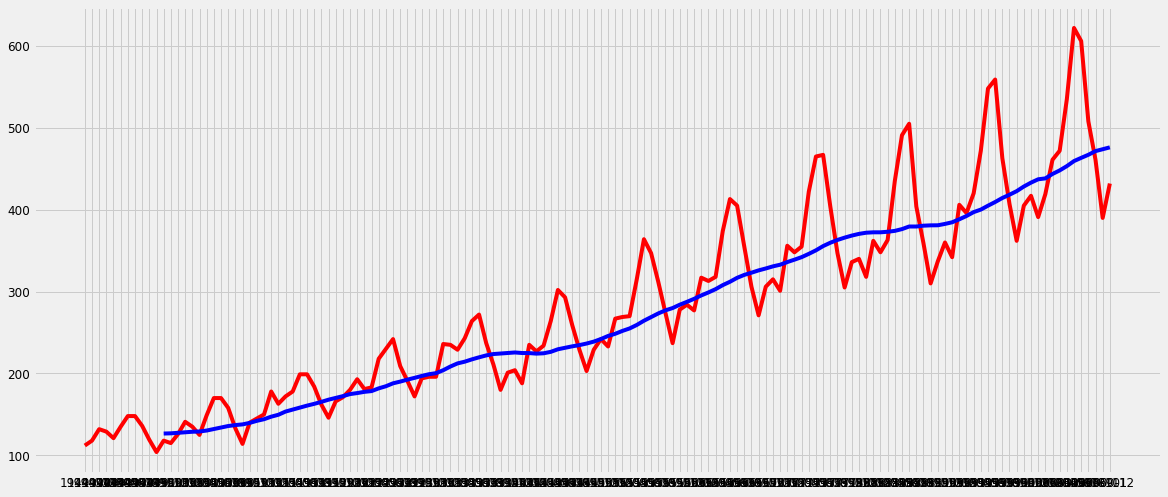

In [14]:
# Plot da série original
plt.plot(dados_serie['Serie_Original_Passageiros'], color = 'red')
# Plot da série suavizada
plt.plot(dados_serie['Serie_Suavizada_Passageiros'], color = 'blue')

In [15]:
# Calculando a diferença entre a série original e a série suavizada
# Aqui estamos removendo a tendência da série original e deixando apenas a sazonalidade
diff_original_suavizada = dados_serie['Serie_Original_Passageiros'] - dados_serie['Serie_Suavizada_Passageiros']
diff_original_suavizada.head(20)

1949-01          NaN
1949-02          NaN
1949-03          NaN
1949-04          NaN
1949-05          NaN
1949-06          NaN
1949-07          NaN
1949-08          NaN
1949-09          NaN
1949-10          NaN
1949-11          NaN
1949-12    -8.666667
1950-01   -11.916667
1950-02    -1.583333
1950-03    12.666667
1950-04     6.166667
1950-05    -4.166667
1950-06    18.666667
1950-07    37.833333
1950-08    36.000000
dtype: float64

In [16]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

In [17]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

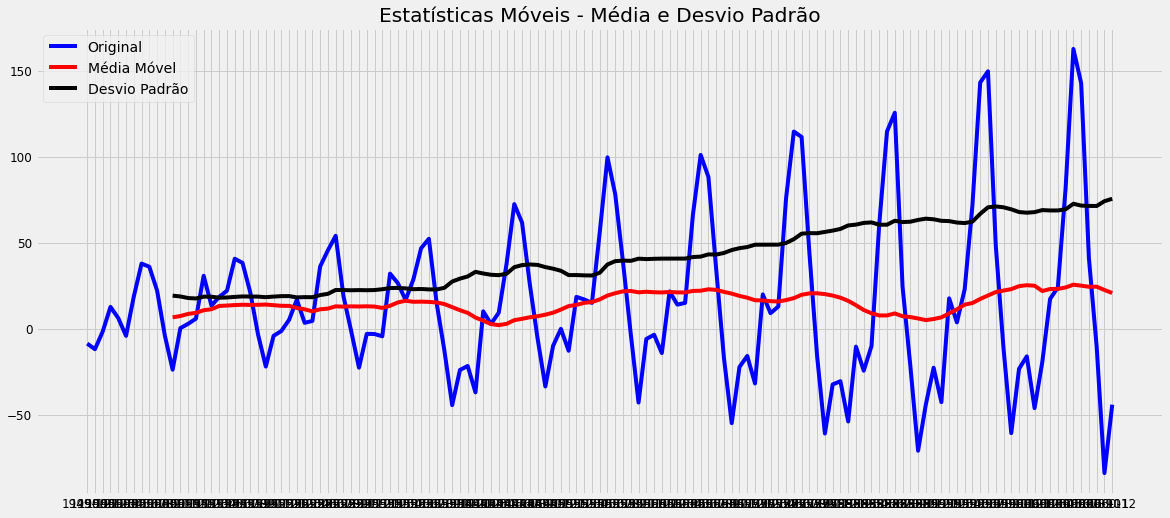


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.164968
Valor-p                           0.022104
Número de Lags Consideradas      13.000000
Número de Observações Usadas    119.000000
Valor Crítico (1%)               -3.486535
Valor Crítico (5%)               -2.886151
Valor Crítico (10%)              -2.579896
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [18]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suavizada)

Aplicamos a suavização e extraímos a tendência da série. Esta série foi transformada e já poderíamos usá-la para construir um modelo preditivo. Faremos isso em aulas futuras.

### Média Móvel Ponderada Exponencial

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [19]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
serie_suavizada_exp = df_serie.ewm(alpha = 0.2, adjust = True).mean()

In [20]:
serie_suavizada_exp

,Serie_Original_Passageiros
1949-01,112.000000
1949-02,115.333333
1949-03,122.163934
1949-04,124.479675
1949-05,123.444550
...,...
1960-08,512.214093
1960-09,511.371274
1960-10,501.297019
1960-11,479.037615


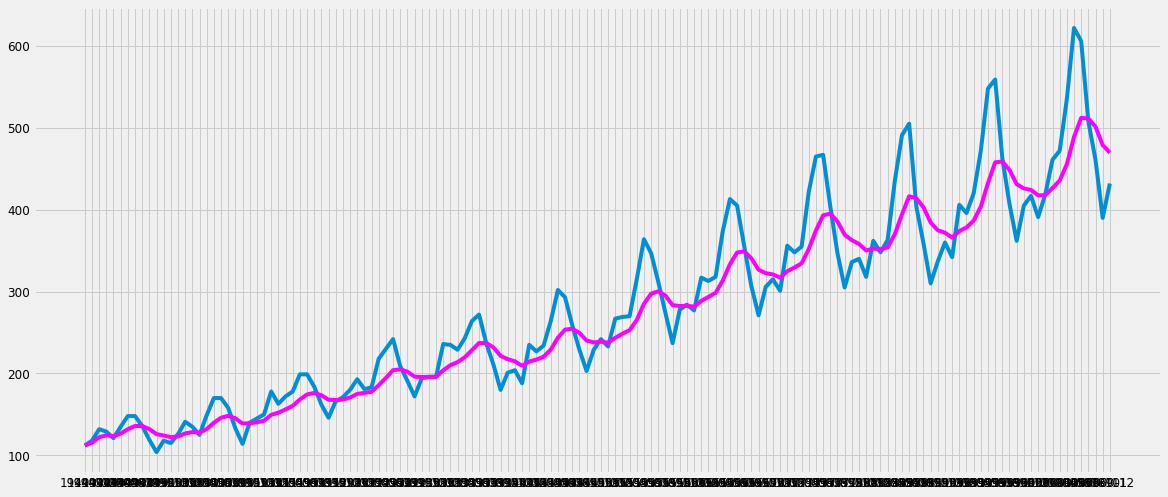

In [21]:
# Plt das séries
plt.plot(df_serie)
plt.plot(serie_suavizada_exp, color = 'magenta')

Suavização aplicada. Vamos agora calcular a diferença e aplicar o teste de estacionaridade.

In [22]:
# Diferença
diff_original_suav_exp = df_serie.Serie_Original_Passageiros - serie_suavizada_exp.Serie_Original_Passageiros

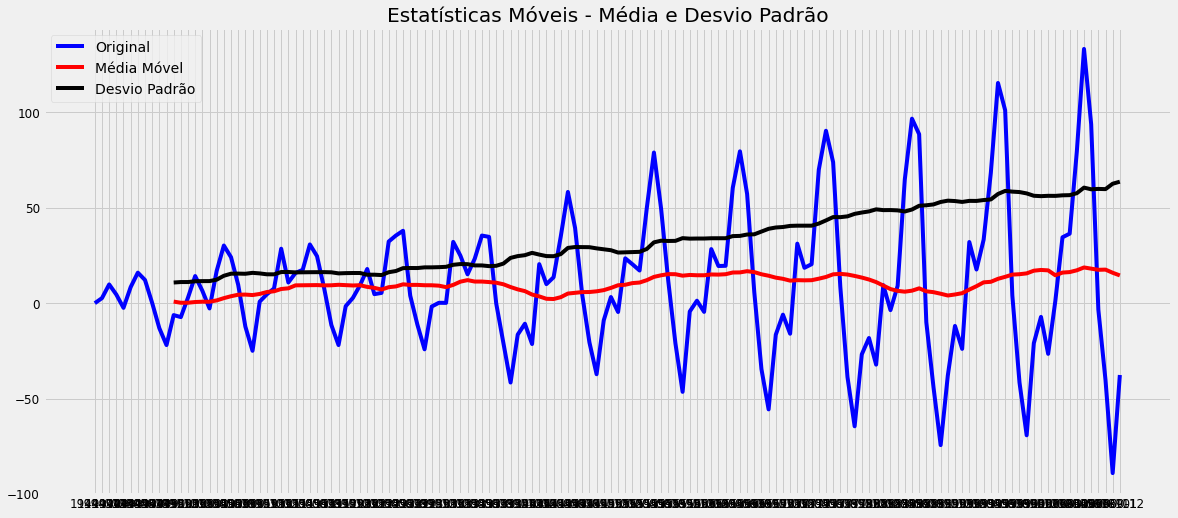


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.800501
Valor-p                           0.058202
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [23]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suav_exp)

Perceba que a Suavização Exponencial não foi suficiente para deixar a série estacionária.

**Com a suavização podemos transformar nossa série em estacionária. Mas essas técnicas simples de suavização não funcionam em todos os casos, principalmente nos de alta sazonalidade. E para esses casos precisamos da Diferenciação, tema da próxima aula.**